# Pre_trained model + Fine Tuning

In [3]:
import pandas as pd

In [4]:
# CSV 파일 불러오기
df= pd.read_csv(r"C:\Users\DoHyeonjik\GachonUniv\3-2\datasets\DL\DSA_features.csv")
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.280854,34.1980,-2.9038,28.080803,5.299132,1.350075,-1.491537,11.2240,-11.65100,14.670334,...,0.200829,-0.040701,0.297666,0.708480,-0.117430,4.135451e-02,0.203358,-0.310022,basketBall,p8
9116,9.591118,51.6970,-3.4129,35.722025,5.976791,2.981144,0.086304,6.9951,-11.76400,5.329897,...,0.148745,-0.266377,0.224716,0.554670,-0.250950,3.355704e-02,0.183186,-0.736410,basketBall,p8
9117,9.599113,27.9300,-1.0765,48.850886,6.989341,0.449237,-0.728367,3.7801,-8.36910,5.683022,...,0.310748,-0.009505,-0.237786,0.088854,-0.477260,2.026107e-02,0.142341,0.668438,basketBall,p8
9118,9.692482,72.7820,-2.6734,59.378336,7.705734,4.491114,-0.582724,6.1216,-8.85710,4.162963,...,0.156493,0.050624,0.533023,0.677800,0.055941,1.356379e-02,0.116464,-1.482489,basketBall,p8


In [5]:
#레이블 확인
df['activity'].value_counts()

activity
sitting                    480
walkingTreadmillIncline    480
jumping                    480
rowing                     480
cyclingVertical            480
cyclingHorizontal          480
crossTrainer               480
stepper                    480
runningTreadmill           480
walkingTreadmillFlat       480
standing                   480
walkingLot                 480
movingInElevator           480
standingInElevatorStill    480
decendingStairs            480
ascendingStairs            480
lyingRigh                  480
lyingBack                  480
basketBall                 480
Name: count, dtype: int64

In [6]:
#RA, LA 나누기
df_RA = df.filter(regex='RA_')
df_LA = df.filter(regex='LA_')
df_RA

,RA_xacc_mean,RA_xacc_max,RA_xacc_min,RA_xacc_var,RA_xacc_std,RA_xacc_skew,RA_yacc_mean,RA_yacc_max,RA_yacc_min,RA_yacc_var,...,RA_ymag_min,RA_ymag_var,RA_ymag_std,RA_ymag_skew,RA_zmag_mean,RA_zmag_max,RA_zmag_min,RA_zmag_var,RA_zmag_std,RA_zmag_skew
0,0.679134,0.75930,0.58542,0.001546,0.039324,-0.415694,5.713088,5.8483,5.5956,0.003779,...,-0.57428,0.000012,0.003401,-0.052190,-0.211136,-0.18401,-0.24523,0.000044,0.006638,-1.153902
1,0.644964,0.73158,0.53064,0.001333,0.036508,0.410625,5.795154,5.9546,5.6687,0.001132,...,-0.57398,0.000005,0.002216,0.222740,-0.206431,-0.18054,-0.23624,0.000032,0.005660,0.458427
2,0.608212,0.67737,0.53546,0.000637,0.025244,0.153302,5.833086,5.8918,5.7656,0.000488,...,-0.57563,0.000004,0.001954,-0.221765,-0.205648,-0.18342,-0.22933,0.000024,0.004868,-0.984915
3,0.591138,0.71177,0.51524,0.001349,0.036731,0.525019,5.863846,5.9645,5.7556,0.001423,...,-0.57858,0.000007,0.002688,0.075011,-0.203739,-0.17999,-0.22958,0.000026,0.005099,0.185634
4,0.558168,0.67190,0.50535,0.000626,0.025020,1.076782,5.884745,5.9401,5.8384,0.000471,...,-0.57996,0.000005,0.002278,-0.219440,-0.203684,-0.17904,-0.22924,0.000027,0.005175,-0.820907
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,8.690373,30.46300,-4.90150,47.192912,6.869710,0.650080,2.187710,41.3410,-10.1410,81.350613,...,-0.89670,0.177217,0.420971,1.232819,-0.120793,0.58641,-0.61373,0.077901,0.279107,0.611462
9116,6.477090,48.54700,-9.96820,44.135927,6.643488,1.675812,5.845459,33.7910,-48.3200,93.600217,...,-0.85305,0.158099,0.397617,1.560701,-0.133269,0.51707,-0.52776,0.058400,0.241661,0.574120
9117,6.309986,27.29900,-8.43140,57.018917,7.551087,0.108921,6.342772,27.0570,-6.6706,51.945094,...,-0.83512,0.126188,0.355229,1.598340,-0.567238,-0.14483,-0.82409,0.023408,0.152998,0.598665
9118,5.020496,30.16600,-20.25100,67.001032,8.185416,0.157547,5.824265,27.6300,-19.8830,63.100134,...,-0.87361,0.174494,0.417725,0.758435,0.211566,0.67931,-0.22328,0.060114,0.245181,0.316989


In [26]:
# 각 데이터에 레이블 삽입
df_RA.insert(3, 'activity', df['activity'])
df_LA.insert(3, 'activity', df['activity'])


ValueError: cannot insert activity, already exists

In [31]:
# 레이블(activity)를 문자열에서 숫자로 변환
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_RA['activity'] = label_encoder.fit_transform(df_RA['activity'])

label_encoder = LabelEncoder()
df_LA['activity'] = label_encoder.fit_transform(df_LA['activity'])


Index(['RA_xacc_mean', 'RA_xacc_max', 'RA_xacc_min', 'activity', 'RA_xacc_var',
       'RA_xacc_std', 'RA_xacc_skew', 'RA_yacc_mean', 'RA_yacc_max',
       'RA_yacc_min', 'RA_yacc_var', 'RA_yacc_std', 'RA_yacc_skew',
       'RA_zacc_mean', 'RA_zacc_max', 'RA_zacc_min', 'RA_zacc_var',
       'RA_zacc_std', 'RA_zacc_skew', 'RA_xgyro_mean', 'RA_xgyro_max',
       'RA_xgyro_min', 'RA_xgyro_var', 'RA_xgyro_std', 'RA_xgyro_skew',
       'RA_ygyro_mean', 'RA_ygyro_max', 'RA_ygyro_min', 'RA_ygyro_var',
       'RA_ygyro_std', 'RA_ygyro_skew', 'RA_zgyro_mean', 'RA_zgyro_max',
       'RA_zgyro_min', 'RA_zgyro_var', 'RA_zgyro_std', 'RA_zgyro_skew',
       'RA_xmag_mean', 'RA_xmag_max', 'RA_xmag_min', 'RA_xmag_var',
       'RA_xmag_std', 'RA_xmag_skew', 'RA_ymag_mean', 'RA_ymag_max',
       'RA_ymag_min', 'RA_ymag_var', 'RA_ymag_std', 'RA_ymag_skew',
       'RA_zmag_mean', 'RA_zmag_max', 'RA_zmag_min', 'RA_zmag_var',
       'RA_zmag_std', 'RA_zmag_skew'],
      dtype='object')


C:\TempFolder\ipykernel_23624\2440497406.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_RA['activity'] = label_encoder.fit_transform(df_RA['activity'])
C:\TempFolder\ipykernel_23624\2440497406.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LA['activity'] = label_encoder.fit_transform(df_LA['activity'])


In [9]:
df_RA['activity'].value_counts()

activity
12    480
18    480
6     480
10    480
4     480
3     480
2     480
15    480
11    480
17    480
13    480
16    480
9     480
14    480
5     480
0     480
8     480
7     480
1     480
Name: count, dtype: int64

In [10]:
#레이블 분리: RA
df_RA_Label = df_RA['activity']
df_RA_data = df_RA.drop('activity', axis=1)
# print(df_RA_Label)
# print(df_RA_data)

#레이블 분리 : LA
df_LA_Label = df_LA['activity']
df_LA_data = df_LA.drop('activity', axis=1)

In [11]:
#traindata와 testdata로 분리
from sklearn.model_selection import train_test_split

x_train_RA, x_test_RA, y_train_RA, y_test_RA = train_test_split(df_RA_data, df_RA_Label, test_size=0.25, random_state=21)
x_train_LA, x_test_LA, y_train_LA, y_test_LA = train_test_split(df_LA_data, df_LA_Label, test_size=0.25, random_state=21)

In [12]:
x_train_RA.shape
x_train_LA.shape

(6840, 54)

In [41]:
from collections import Counter
import numpy as np

def split_sequences(sequences, n_steps):
    X, y = list(), list()  # 빈 리스트를 생성하여 시퀀스 데이터와 레이블을 담을 공간을 만듦
    for i in range(len(sequences)):  # 전체 시퀀스 데이터를 순회
        # find the end of this pattern
        end_ix = i + n_steps  # 현재 인덱스(i)에서 n_steps만큼 떨어진 시퀀스의 끝을 계산
        # check if we are beyond the dataset
        if end_ix > len(sequences):  # 시퀀스 끝이 데이터의 범위를 넘어서는지 확인
            break  # 범위를 넘으면 루프 종료
        # gather input (X) and output parts (y)
        seq_x = sequences[i:end_ix, :-1]  # 입력 데이터 (특징 데이터)
        seq_y_values = sequences[i:end_ix, -1]  # 시퀀스 동안의 출력 데이터 (레이블들)
            
        # 가장 빈번하게 나온 레이블 찾기
        most_common_label = Counter(seq_y_values).most_common(1)[0][0]
        if i ==0: print(most_common_label)
        
        X.append(seq_x)  # 입력 데이터 추가
        y.append(most_common_label)  # 가장 많이 나온 레이블 추가
    
    return np.array(X), np.array(y)  # 리스트를 numpy 배열로 변환하여 반환

In [34]:
#Merge train and test x/y data to apply sequence transformation function
#훈련 데이터와 테스트 데이터의 레이블과 데이터를 병합 -> 시퀀스 변형을 위해서
y_train_array_RA = np.array(y_train_RA) #RA의 훈련 레이블을 넘파이로 바꾸고
train_set_RA = np.c_[x_train_RA, y_train_array_RA] #RA의 훈련데이터와 훈련레이블을 병합
y_train_array_LA = np.array(y_train_LA) #LA의 훈련 레이블을 넘파이로 바꾸고
train_set_LA = np.c_[x_train_LA, y_train_array_LA] #LA의 훈련데이터와 훈련레이블을 병합
print(train_set_RA.shape)

y_test_array_RA = np.array(y_test_RA) #RA의 테스트 레이블을 넘파이로 바꾸고
test_set_RA = np.c_[x_test_RA, y_test_array_RA] #RA의 테스트데이터와 테스트레이블을 병합
y_test_array_LA = np.array(y_test_LA) #LA의 테스트 레이블을 넘파이로 바꾸고
test_set_LA = np.c_[x_test_LA, y_test_array_LA] #LA의 테스트데이터와 테스트레이블을 병합

(6840, 55)


In [45]:
#split_sequence 적용
n_step = 3 

x_train_seq_RA, y_train_seq_RA = split_sequences(train_set_RA, n_step) # RA 훈련 데이터
print(x_train_seq_RA.shape, y_train_seq_RA.shape)

x_test_seq_RA, y_test_seq_RA = split_sequences(test_set_RA, n_step) # RA 훈련 레이블
print(x_test_seq_RA.shape, y_test_seq_RA.shape)

x_train_seq_LA, y_train_seq_LA = split_sequences(train_set_LA, n_step) # LA 훈련 데이터
print(x_train_seq_LA.shape, y_train_seq_LA.shape)

x_test_seq_LA, y_test_seq_LA = split_sequences(test_set_LA, n_step) # RA 훈련 레이블
print(x_test_seq_LA.shape, y_test_seq_LA.shape)


9.0
(6838, 3, 54) (6838,)
7.0
(2278, 3, 54) (2278,)
9.0
(6838, 3, 54) (6838,)
7.0
(2278, 3, 54) (2278,)


In [46]:
#레이블 원핫인코딩
from keras.utils import to_categorical

y_train_seq_RA = to_categorical(y_train_seq_RA) #RA 훈련 레이블 
y_train_seq_LA = to_categorical(y_train_seq_LA) #LA 훈련 레이블

y_test_seq_RA = to_categorical(y_test_seq_RA) #RA 테스트 레이블
y_test_seq_LA = to_categorical(y_test_seq_LA) #RA 테스트 레이블

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [47]:
n_timesteps, n_features, n_outputs = x_train_seq_RA.shape[1], x_train_seq_RA.shape[2], y_train_seq_RA.shape[1]
print(n_timesteps, n_features, n_outputs)

3 54 19


In [49]:
# RA 모델 생성
from tensorflow import keras
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
# from keras.layers import 

model = keras.models.Sequential()
model.add(LSTM(units=128, input_shape=(n_timesteps, n_features)))
model.add(Dense(128, activation='relu'))
model.add(Dense(n_outputs, activation='softmax'))
model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

model.summary()

C:\Users\DoHyeonjik\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          93,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 19)                  │           2,451 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,659 (440.07 KB)

 Trainable params: 112,659 (440.07 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
history = model.fit(x_train_seq_RA, y_train_seq_RA, epochs=20, batch_size=32, validation_split=0.1, shuffle=True)

Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.2025 - loss: 2.5692 - val_accuracy: 0.5263 - val_loss: 1.4297
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6204 - loss: 1.1801 - val_accuracy: 0.7368 - val_loss: 0.9514
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7688 - loss: 0.7567 - val_accuracy: 0.7792 - val_loss: 0.7875
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8167 - loss: 0.6067 - val_accuracy: 0.8275 - val_loss: 0.7030
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8532 - loss: 0.4842 - val_accuracy: 0.8275 - val_loss: 0.6939
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8780 - loss: 0.4059 - val_accuracy: 0.8538 - val_loss: 0.5954
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9082 - loss: 0.3340 - val_accuracy: 0.8509 - val_loss: 0.6054
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9197 - loss: 0.2751 - val_accuracy: 0.

In [53]:
# 모델 평가
# model.evaluate(x_train_seq_RA, y_train_seq_RA)
model.evaluate(x_test_seq_RA, y_test_seq_RA)
#loss가 큼

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8704 - loss: 0.6823


[0.6752218008041382, 0.8656716346740723]

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
Confusion Matrix


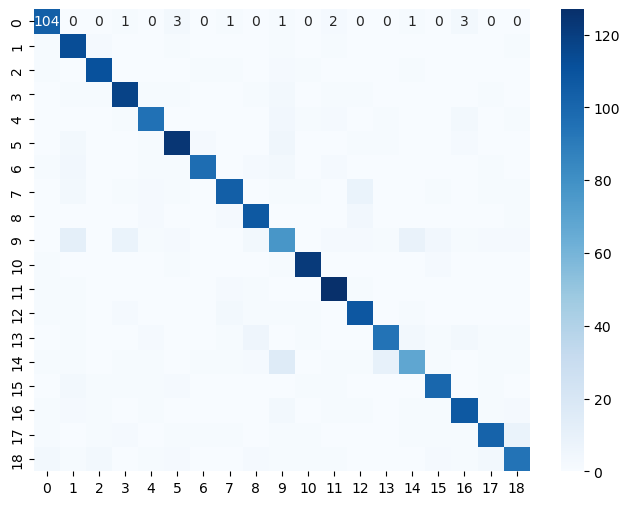

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

y_test_arg=np.argmax(y_test_seq_RA, axis=1)
Y_pred = np.argmax(model.predict(x_test_seq_RA),axis=1)
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

In [58]:
base_loss, base_accuracy = model.evaluate(x_test_seq_RA, y_test_seq_RA) # model의 loss와 accuracy
model_file = r'C:\users\DoHyeonjik\Desktop\RA_Model.h5' #위 경로에 저장

keras.models.save_model(model, model_file, include_optimizer=False) # 모델 저장
print('model saved at', model_file) 
score = base_accuracy*100 #퍼센트로 변환
print(format(score))
print(format(base_loss))

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8704 - loss: 0.6823


model saved at C:\users\DoHyeonjik\Desktop\RA_Model.h5
86.56716346740723
0.6752218008041382


In [59]:
# LA 모델 생성
model2 = keras.models.Sequential()
model2.add(LSTM(units=128, input_shape=(n_timesteps, n_features)))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(n_outputs, activation='softmax'))
model2.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

model2.summary()

C:\Users\DoHyeonjik\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                        │ (None, 128)                 │          93,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 19)                  │           2,451 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 112,659 (440.07 KB)

 Trainable params: 112,659 (440.07 KB)

 Non-trainable params: 0 (0.00 B)

In [60]:
history2=model2.fit(x_train_seq_LA, y_train_seq_LA, epochs=20, batch_size=32, validation_split=0.1, shuffle=True)

Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2348 - loss: 2.4843 - val_accuracy: 0.6009 - val_loss: 1.2196
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6159 - loss: 1.1050 - val_accuracy: 0.7266 - val_loss: 0.9176
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7679 - loss: 0.7538 - val_accuracy: 0.8085 - val_loss: 0.6798
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8419 - loss: 0.5433 - val_accuracy: 0.8114 - val_loss: 0.6634
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8734 - loss: 0.4422 - val_accuracy: 0.8509 - val_loss: 0.5790
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8911 - loss: 0.3872 - val_accuracy: 0.8450 - val_loss: 0.5813
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9080 - loss: 0.3124 - val_accuracy: 0.8465 - val_loss: 0.5922
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9254 - loss: 0.2529 - val_accuracy: 0.

In [61]:
#LA 모델 평가
model2.evaluate(x_test_seq_LA, y_test_seq_LA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8808 - loss: 0.6157


[0.6560221910476685, 0.8687444925308228]

In [63]:
base_loss2, base_accuracy2 = model2.evaluate(x_test_seq_LA, y_test_seq_LA) # model의 loss와 accuracy
model_file2 = r'C:\users\DoHyeonjik\Desktop\LA_Model.h5' #위 경로에 저장

keras.models.save_model(model2, model_file2, include_optimizer=False) # 모델 저장
print('model saved at', model_file2) 
score2 = base_accuracy2*100 #퍼센트로 변환
print(format(score2))
print(format(base_loss2))

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8808 - loss: 0.6157


model saved at C:\users\DoHyeonjik\Desktop\LA_Model.h5
86.87444925308228
0.6560221910476685


# 전이 학습 시작


In [64]:
# 1) 모델 불러오기
base_model = keras.models.load_model(model_file2) #base_model은 LA 모델이 들어있음

In [65]:
# 2) 기존 모델 평가
base_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
base_model.evaluate(x_test_seq_LA, y_test_seq_LA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8808 - loss: 0.6157 


[0.6560221910476685, 0.8687444925308228]

In [66]:
# 3) LA 모델에 RA 데이터 evaluate
base_model.evaluate(x_test_seq_RA, y_test_seq_RA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2527 - loss: 5.2841


[5.12110710144043, 0.263827919960022]

In [72]:
# 4) 전이학습 시작
base_model.trainable = False #기존의 모델 동결

#함수: 모델의 레이어를 뒷부분을 잘라내는 함수
def remove_last_layers(model, num_layers_to_remove):
    model_layers = model.layers[:-num_layers_to_remove]
    print(model_layers)
    new_model= keras.models.Sequential(model_layers)
    return new_model

#모델의 기존의 출력층 제거
new_model = remove_last_layers(base_model, 1)

#새로운 출력층 추가
new_model.add(Dense(256, activation='relu'))
new_model.add(Dense(n_outputs, activation='softmax'))
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')


[<LSTM name=lstm_1, built=True>, <Dense name=dense_2, built=True>]


In [73]:
# 6)모델 확인
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<LSTM name=lstm_1, built=True>",lstm_1,False
1,"<Dense name=dense_2, built=True>",dense_2,False
2,"<Dense name=dense_6, built=False>",dense_6,True
3,"<Dense name=dense_7, built=False>",dense_7,True


In [75]:
# 7)모델 훈련
history3 = new_model.fit(x_test_seq_RA, y_test_seq_RA, epochs=20, batch_size=32, validation_split=0.1, shuffle=True)

Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.2530 - loss: 2.5513 - val_accuracy: 0.4649 - val_loss: 1.7491
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5226 - loss: 1.5453 - val_accuracy: 0.5132 - val_loss: 1.5509
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5434 - loss: 1.4105 - val_accuracy: 0.4474 - val_loss: 1.5859
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5610 - loss: 1.3442 - val_accuracy: 0.5000 - val_loss: 1.5459
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6189 - loss: 1.2190 - val_accuracy: 0.5482 - val_loss: 1.4491
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6032 - loss: 1.2324 - val_accuracy: 0.5088 - val_loss: 1.4554
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6067 - loss: 1.1949 - val_accuracy: 0.5395 - val_loss: 1.4581
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6237 - loss: 1.1580 - val_accuracy: 0.5395 - val_loss:

In [76]:
# 8)훈련한 모델 평가
new_model.evaluate(x_test_seq_RA, y_test_seq_RA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7752 - loss: 0.7034


[0.7656369209289551, 0.753731369972229]

#### 이미 성능이 많이 올라옴

#### 미세 조정을 통해서 모델 최적화

In [77]:
base_model.trainable=True
new_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [78]:
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<LSTM name=lstm_1, built=True>",lstm_1,True
1,"<Dense name=dense_2, built=True>",dense_2,True
2,"<Dense name=dense_6, built=True>",dense_6,True
3,"<Dense name=dense_7, built=True>",dense_7,True


In [79]:
history4= new_model.fit(x_train_seq_RA, y_train_seq_RA, epochs = 20 , batch_size=32, validation_split=0.1, shuffle=True)

Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6637 - loss: 1.1281 - val_accuracy: 0.7749 - val_loss: 0.8290
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8216 - loss: 0.6191 - val_accuracy: 0.7939 - val_loss: 0.7548
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8730 - loss: 0.4520 - val_accuracy: 0.8275 - val_loss: 0.6784
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9000 - loss: 0.3563 - val_accuracy: 0.8319 - val_loss: 0.6172
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9270 - loss: 0.2637 - val_accuracy: 0.8304 - val_loss: 0.6292
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9343 - loss: 0.2147 - val_accuracy: 0.8231 - val_loss: 0.6541
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9498 - loss: 0.1688 - val_accuracy: 0.8582 - val_loss: 0.6014
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9534 - loss: 0.1460 - val_accuracy: 0.

In [80]:
new_model.evaluate(x_test_seq_RA, y_test_seq_RA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8559 - loss: 0.8068


[0.8523181676864624, 0.8489903211593628]

#### 모델의 정확도가 더 올라감

_______
## RA 모델에 LA 데이터 적용

In [81]:
# 1) 모델 불러오기
base_model_RA = keras.models.load_model(model_file)

In [84]:
# 2) 모델 확인
base_model_RA.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
base_model_RA.evaluate(x_test_seq_RA, y_test_seq_RA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8704 - loss: 0.6823 


[0.6752218008041382, 0.8656716346740723]

In [85]:
# 3) RA 모델에 LA 데이터 넣어보기
base_model_RA.evaluate(x_test_seq_LA, y_test_seq_LA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2398 - loss: 6.5632


[6.5398969650268555, 0.2287093997001648]

In [89]:
# 4) 전이 학습 시작
# 4-1) 기존 모델 동결
base_model_RA.trainable = False

# 4-2) 출력층 레이어 삭제
new_model_RA = remove_last_layers(base_model_RA, 1)

# 4-3) 모델에 새 출력층 생성
new_model_RA.add(Dense(256, activation='relu'))
new_model_RA.add(Dense(n_outputs, activation='softmax'))
new_model_RA.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 4-4) 모델 요약
new_model_RA.summary()

[<LSTM name=lstm, built=True>, <Dense name=dense, built=True>]


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          93,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 110,208 (430.50 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 110,208 (430.50 KB)

In [90]:
# 5) RA 모델에 LA 데이터 학습
new_model_RA.fit(x_train_seq_LA, y_train_seq_LA, epochs=20, batch_size=32, validation_split=0.1, shuffle=True)

Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.3387 - loss: 2.1558 - val_accuracy: 0.5058 - val_loss: 1.4860
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5517 - loss: 1.3834 - val_accuracy: 0.5526 - val_loss: 1.3485
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5778 - loss: 1.2497 - val_accuracy: 0.5599 - val_loss: 1.3204
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6014 - loss: 1.1884 - val_accuracy: 0.5833 - val_loss: 1.2845
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6180 - loss: 1.1476 - val_accuracy: 0.6067 - val_loss: 1.2444
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6370 - loss: 1.1009 - val_accuracy: 0.6009 - val_loss: 1.2329
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6540 - loss: 1.0430 - val_accuracy: 0.6067 - val_loss: 1.2044
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6786 - loss: 0.9938 - val_accuracy: 0.

In [92]:
# 6) 새 모델 평가
new_model_RA.evaluate(x_test_seq_LA, y_test_seq_LA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6557 - loss: 1.1327


[1.1605277061462402, 0.6518875956535339]

In [95]:
# 7) 미세조정
# 기존의 모델 동결 해제
base_model_RA.trainable=True
new_model_RA.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 동결 해제 여부 확인
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in new_model_RA.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<LSTM name=lstm, built=True>",lstm,True
1,"<Dense name=dense, built=True>",dense,True
2,"<Dense name=dense_14, built=True>",dense_14,True
3,"<Dense name=dense_15, built=True>",dense_15,True


In [96]:
# 8) 미세조정한 모델 훈련
history4 = new_model_RA.fit(x_train_seq_LA, y_train_seq_LA, epochs=20, batch_size=32, validation_split=0.1, shuffle=True)

new_model_RA.evaluate(x_test_seq_LA, y_test_seq_LA)

Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7567 - loss: 0.7232 - val_accuracy: 0.7368 - val_loss: 0.8529
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8532 - loss: 0.4603 - val_accuracy: 0.7705 - val_loss: 0.7863
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8905 - loss: 0.3525 - val_accuracy: 0.7953 - val_loss: 0.7255
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9174 - loss: 0.2613 - val_accuracy: 0.7909 - val_loss: 0.7467
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9353 - loss: 0.2099 - val_accuracy: 0.8099 - val_loss: 0.6868
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9544 - loss: 0.1642 - val_accuracy: 0.8392 - val_loss: 0.6354
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9689 - loss: 0.1080 - val_accuracy: 0.8216 - val_loss: 0.6730
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9732 - loss: 0.0965 - val_accuracy: 0.

[0.9378698468208313, 0.8441615700721741]

#### 모델의 성능이 높아진 것을 볼 수있다
우하하

________________________________
## (추가)LSTM을 제외한 두개의 Dense층 모두 제거 후 전이학습 수행

In [97]:
# 1) RA 모델 불러오기
RA_model = keras.models.load_model(model_file)

# 2) 컴파일 후 확인
RA_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')
RA_model.evaluate(x_test_seq_RA, y_test_seq_RA)

72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8704 - loss: 0.6823 


[0.6752218008041382, 0.8656716346740723]

In [101]:
# 3) 전이학습시작
# 3_1) 기존 모델 동결
RA_model.trainable = False

# 3_2) 출력층 레이어 두개 삭제
model_RA = remove_last_layers(RA_model, 2)
model_RA.summary()

[<LSTM name=lstm, built=True>]


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          93,696 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,696 (366.00 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 93,696 (366.00 KB)

In [102]:
# 3_3) 모델에 새 출력층 생성
model_RA.add(Dense(128, activation='relu'))
model_RA.add(Dense(n_outputs, activation='softmax'))
model_RA.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 3_4) 모델 요약
model_RA.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 128)                 │          93,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,696 (366.00 KB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 93,696 (366.00 KB)

In [103]:
# 4) 모델 훈련
model_RA.fit(x_train_seq_LA, y_train_seq_LA, epochs=20, batch_size=32, validation_split=0.1, shuffle=True)

Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.2657 - loss: 2.4458 - val_accuracy: 0.5424 - val_loss: 1.4759
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5820 - loss: 1.3594 - val_accuracy: 0.5556 - val_loss: 1.2889
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6196 - loss: 1.1758 - val_accuracy: 0.6053 - val_loss: 1.1749
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6538 - loss: 1.0628 - val_accuracy: 0.6360 - val_loss: 1.1066
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6870 - loss: 0.9958 - val_accuracy: 0.6652 - val_loss: 1.0542
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7164 - loss: 0.9314 - val_accuracy: 0.6696 - val_loss: 1.0648
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7231 - loss: 0.8951 - val_accuracy: 0.6901 - val_loss: 1.0184
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7360 - loss: 0.8504 - val_accuracy: 0.

In [104]:
model_RA.evaluate(x_test_seq_LA, y_test_seq_LA)
# 미세하게 좋아짐 (loss: 1.16 -> 0.98 / acc : 0.65->0.69)

72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6962 - loss: 0.9662


[0.9864743947982788, 0.6944688558578491]

In [106]:
# 5)미세조정
RA_model.trainable= True
model_RA.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

# 동결해제 여부 확인
import pandas as pd
display_layers = [(layer, layer.name, layer.trainable) for layer in model_RA.layers]
pd.DataFrame(display_layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

,Layer Type,Layer Name,Layer Trainable
0,"<LSTM name=lstm, built=True>",lstm,True
1,"<Dense name=dense_20, built=True>",dense_20,True
2,"<Dense name=dense_21, built=True>",dense_21,True


In [107]:
# 6) 미세조정한 모델 훈련
history4 = model_RA.fit(x_train_seq_LA, y_train_seq_LA, epochs=20, batch_size=32, validation_split=0.1, shuffle=True)
model_RA.evaluate(x_test_seq_LA, y_test_seq_LA)

Epoch 1/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8074 - loss: 0.5943 - val_accuracy: 0.7895 - val_loss: 0.7056
Epoch 2/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8900 - loss: 0.3701 - val_accuracy: 0.7836 - val_loss: 0.6903
Epoch 3/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9125 - loss: 0.2881 - val_accuracy: 0.8114 - val_loss: 0.6633
Epoch 4/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9357 - loss: 0.2133 - val_accuracy: 0.8070 - val_loss: 0.6186
Epoch 5/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9520 - loss: 0.1575 - val_accuracy: 0.8377 - val_loss: 0.5981
Epoch 6/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9664 - loss: 0.1232 - val_accuracy: 0.8406 - val_loss: 0.6299
Epoch 7/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9753 - loss: 0.0974 - val_accuracy: 0.8450 - val_loss: 0.6017
Epoch 8/20
193/193 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9690 - loss: 0.1007 - val_accuracy: 0.

[0.7073639631271362, 0.8634767532348633]

#### 결과 : acc의 변화는 크지 않지만 loss 값이 많이 개선되었음